<a href="https://colab.research.google.com/github/Nayanathara00/Nayanathara00/blob/main/Rice_leaf_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/My Drive/Rice_Leaf_Dataset/rice-leaf-disease-image.zip" -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Bacterialblight/BACTERIALBLIGHT1_141.JPG  
  inflating: /content/Bacterialblight/BACTERIALBLIGHT1_142.JPG  
  inflating: /content/Bacterialblight/BACTERIALBLIGHT1_143.JPG  
  inflating: /content/Bacterialblight/BACTERIALBLIGHT1_144.JPG  
  inflating: /content/Bacterialblight/BACTERIALBLIGHT1_145.JPG  
  inflating: /content/Bacterialblight/BACTERIALBLIGHT1_146.JPG  
  inflating: /content/Bacterialblight/BACTERIALBLIGHT1_147.jpg  
  inflating: /content/Bacterialblight/BACTERIALBLIGHT1_148.jpg  
  inflating: /content/Bacterialblight/BACTERIALBLIGHT1_149.jpg  
  inflating: /content/Bacterialblight/BACTERIALBLIGHT1_150.jpg  
  inflating: /content/Bacterialblight/BACTERIALBLIGHT1_151.jpg  
  inflating: /content/Bacterialblight/BACTERIALBLIGHT1_152.jpg  
  inflating: /content/Bacterialblight/BACTERIALBLIGHT1_153.jpg  
  inflating: /content/Bacterialblight/BACTERIALBLIGHT1_154.jpg  
  inflating: /content/Bacterialblight/B

In [4]:
import os
import pandas as pd

# Define dataset path (Update if needed)
dataset_path = "/content"  # Root directory where your dataset is extracted

# Initialize list to store file info
data = []

# Loop through each disease category (folder)
for label in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, label)

    if os.path.isdir(class_path):  # Ensure it's a folder
        for filename in os.listdir(class_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):  # Consider only image files
                data.append([filename, label])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["filename", "label"])

# Save as CSV
csv_path = "/content/rice_leaf_labels.csv"
df.to_csv(csv_path, index=False)

print(f"✅ CSV file saved at: {csv_path}")


✅ CSV file saved at: /content/rice_leaf_labels.csv


In [5]:
df.head()

,filename,label
0,BACTERIALBLIGHT2_059.jpg,Bacterialblight
1,BACTERIALBLIGHT1_048.jpg,Bacterialblight
2,BACTERIALBLIGHT2_101.jpg,Bacterialblight
3,BACTERIALBLIGHT1_018.jpg,Bacterialblight
4,BACTERIALBLIGHT2_114.jpg,Bacterialblight


In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [10]:
csv_path = "/content/rice_leaf_labels.csv"
df = pd.read_csv(csv_path)

# Check first few rows
print(df.head())

                   filename            label
0  BACTERIALBLIGHT2_059.jpg  Bacterialblight
1  BACTERIALBLIGHT1_048.jpg  Bacterialblight
2  BACTERIALBLIGHT2_101.jpg  Bacterialblight
3  BACTERIALBLIGHT1_018.jpg  Bacterialblight
4  BACTERIALBLIGHT2_114.jpg  Bacterialblight


In [11]:
dataset_path = "/content"  # Update if needed
df["image_path"] = df.apply(lambda row: os.path.join(dataset_path, row["label"], row["filename"]), axis=1)

# Verify paths
print(df.head())

                   filename            label  \
0  BACTERIALBLIGHT2_059.jpg  Bacterialblight   
1  BACTERIALBLIGHT1_048.jpg  Bacterialblight   
2  BACTERIALBLIGHT2_101.jpg  Bacterialblight   
3  BACTERIALBLIGHT1_018.jpg  Bacterialblight   
4  BACTERIALBLIGHT2_114.jpg  Bacterialblight   

                                          image_path  
0  /content/Bacterialblight/BACTERIALBLIGHT2_059.jpg  
1  /content/Bacterialblight/BACTERIALBLIGHT1_048.jpg  
2  /content/Bacterialblight/BACTERIALBLIGHT2_101.jpg  
3  /content/Bacterialblight/BACTERIALBLIGHT1_018.jpg  
4  /content/Bacterialblight/BACTERIALBLIGHT2_114.jpg  


In [12]:
IMG_SIZE = 224

# Function to load and resize images
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)  # Load image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize
    return img

# Apply function to all images
df["image_array"] = df["image_path"].apply(load_and_preprocess_image)

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["label"])

# Save mapping for later use
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'Bacterialblight': 0, 'Blast': 1, 'Brownspot': 2, 'Tungro': 3}


In [15]:
X = np.array(df["image_array"].tolist())  # Image data
y = np.array(df["label_encoded"])  # Labels

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 3414, Test size: 854


In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [18]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [19]:
df_final = df[["filename", "label", "image_path", "label_encoded"]]
df_final.to_csv("/content/preprocessed_rice_leaf_dataset.csv", index=False)

# Download CSV
from google.colab import files
files.download("/content/preprocessed_rice_leaf_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

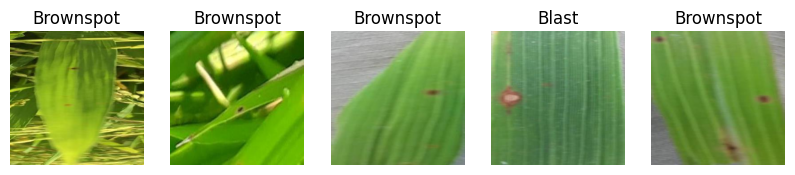

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i])  # Show image
    plt.title(label_encoder.inverse_transform([y_train[i]])[0])  # Show label
    plt.axis("off")
plt.show()